In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn import preprocessing

In [2]:
df=pd.read_csv('chokepoint_2025.csv')

In [3]:
df=pd.read_csv('chokepoint_2025.csv')
df['date']=pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
#df=df[(df['date']>='2020-01-01')&(df['date']<='2025-02-09')].reset_index().drop('index',axis=1)

In [4]:
df

,date,year,month,day,portid,portname,n_container,n_dry_bulk,n_general_cargo,n_roro,...,n_cargo,n_total,capacity_container,capacity_dry_bulk,capacity_general_cargo,capacity_roro,capacity_tanker,capacity_cargo,capacity,ObjectId
0,2019-01-01,2019,1,1,chokepoint1,Suez Canal,21,24,17,5,...,67,89,1.089470e+06,9.051440e+05,135760.142456,21022.019435,1.191096e+06,2.151396e+06,3.342492e+06,1
1,2019-01-02,2019,1,2,chokepoint1,Suez Canal,22,6,8,7,...,43,52,1.505460e+06,3.235757e+05,7951.163188,55181.181876,4.554950e+05,1.892168e+06,2.347663e+06,2
2,2019-01-03,2019,1,3,chokepoint1,Suez Canal,12,17,9,3,...,41,62,4.743254e+05,1.109482e+06,35746.520070,23785.885290,5.717003e+05,1.643340e+06,2.215040e+06,3
3,2019-01-04,2019,1,4,chokepoint1,Suez Canal,18,11,2,1,...,32,47,1.118255e+06,4.216106e+05,0.000000,7595.724839,7.139619e+05,1.547461e+06,2.261423e+06,4
4,2019-01-05,2019,1,5,chokepoint1,Suez Canal,20,8,2,1,...,31,44,1.305583e+06,7.112837e+05,17053.275000,8758.480096,6.389953e+05,2.042679e+06,2.681674e+06,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53563,2024-07-11,2024,7,11,chokepoint9,Dover Strait,28,31,39,11,...,109,161,7.086941e+05,1.415163e+06,60669.055566,72881.702220,1.844592e+06,2.257408e+06,4.102000e+06,53564
53564,2024-07-12,2024,7,12,chokepoint9,Dover Strait,39,20,38,10,...,107,175,1.256194e+06,6.710552e+05,122890.041458,23119.242723,1.516246e+06,2.073259e+06,3.589505e+06,53565
53565,2024-07-13,2024,7,13,chokepoint9,Dover Strait,31,23,46,7,...,107,158,8.431695e+05,9.286497e+05,76518.947681,26175.210559,1.514573e+06,1.874513e+06,3.389086e+06,53566
53566,2024-07-14,2024,7,14,chokepoint9,Dover Strait,30,16,50,14,...,110,172,5.483827e+05,3.883095e+05,101560.732464,67038.186369,1.155255e+06,1.105291e+06,2.260546e+06,53567


In [5]:
df=df[df['portname']=='Suez Canal']
df

,date,year,month,day,portid,portname,n_container,n_dry_bulk,n_general_cargo,n_roro,...,n_cargo,n_total,capacity_container,capacity_dry_bulk,capacity_general_cargo,capacity_roro,capacity_tanker,capacity_cargo,capacity,ObjectId
0,2019-01-01,2019,1,1,chokepoint1,Suez Canal,21,24,17,5,...,67,89,1.089470e+06,9.051440e+05,135760.142456,21022.019435,1.191096e+06,2.151396e+06,3.342492e+06,1
1,2019-01-02,2019,1,2,chokepoint1,Suez Canal,22,6,8,7,...,43,52,1.505460e+06,3.235757e+05,7951.163188,55181.181876,4.554950e+05,1.892168e+06,2.347663e+06,2
2,2019-01-03,2019,1,3,chokepoint1,Suez Canal,12,17,9,3,...,41,62,4.743254e+05,1.109482e+06,35746.520070,23785.885290,5.717003e+05,1.643340e+06,2.215040e+06,3
3,2019-01-04,2019,1,4,chokepoint1,Suez Canal,18,11,2,1,...,32,47,1.118255e+06,4.216106e+05,0.000000,7595.724839,7.139619e+05,1.547461e+06,2.261423e+06,4
4,2019-01-05,2019,1,5,chokepoint1,Suez Canal,20,8,2,1,...,31,44,1.305583e+06,7.112837e+05,17053.275000,8758.480096,6.389953e+05,2.042679e+06,2.681674e+06,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2025-01-04,2025,1,4,chokepoint1,Suez Canal,6,9,5,0,...,20,29,1.399886e+05,4.686452e+05,6635.234646,0.000000,2.323701e+05,6.152690e+05,8.476392e+05,2396
2396,2025-01-05,2025,1,5,chokepoint1,Suez Canal,8,3,6,1,...,18,30,3.023797e+05,8.590534e+04,5420.184850,0.000000,6.804545e+05,3.937052e+05,1.074160e+06,2397
2397,2025-01-06,2025,1,6,chokepoint1,Suez Canal,13,20,5,1,...,39,55,3.057893e+05,7.413007e+05,1441.612810,7376.505542,6.950078e+05,1.055908e+06,1.750916e+06,2398
2398,2025-01-07,2025,1,7,chokepoint1,Suez Canal,8,12,4,0,...,24,41,1.019538e+05,5.108506e+05,29946.088653,0.000000,1.018729e+06,6.427505e+05,1.661480e+06,2399


In [6]:
df=df[['date','n_total']]
df=df.groupby('date').sum().reset_index()
df

,date,n_total
0,2019-01-01,89
1,2019-01-02,52
2,2019-01-03,62
3,2019-01-04,47
4,2019-01-05,44
...,...,...
2227,2025-02-05,32
2228,2025-02-06,30
2229,2025-02-07,30
2230,2025-02-08,22


In [7]:
df.dtypes

date       object
n_total     int64
dtype: object

In [8]:
df.set_index('date', inplace=True)
df

,n_total
date,
2019-01-01,89
2019-01-02,52
2019-01-03,62
2019-01-04,47
2019-01-05,44
...,...
2025-02-05,32
2025-02-06,30
2025-02-07,30


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler=MinMaxScaler()
scaler.fit(df)
df_scaled=scaler.transform(df)

In [11]:
df_scaled

array([[0.89690722],
       [0.51546392],
       [0.6185567 ],
       ...,
       [0.28865979],
       [0.20618557],
       [0.45360825]])

In [12]:
df['total_scaled']=df_scaled

In [13]:
df

,n_total,total_scaled
date,,
2019-01-01,89,0.896907
2019-01-02,52,0.515464
2019-01-03,62,0.618557
2019-01-04,47,0.463918
2019-01-05,44,0.432990
...,...,...
2025-02-05,32,0.309278
2025-02-06,30,0.288660
2025-02-07,30,0.288660


<Axes: xlabel='date'>

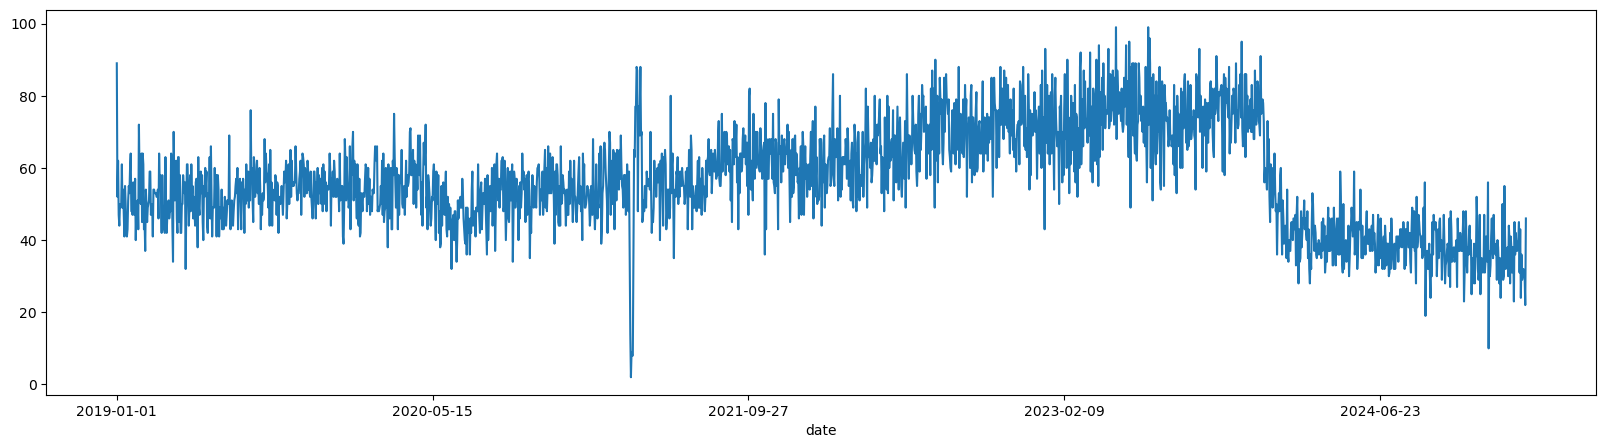

In [14]:
#temp=df['n_total']
temp=df['total_scaled']
df['n_total'].plot(figsize=(20,5))
#temp

In [15]:
df_scaled.shape

(2232, 1)

In [16]:
#temp=df['n_cargo']
#temp.plot(figsize=(20,5))
#temp

In [17]:
temp[:10].to_numpy().shape

(10,)

In [18]:
def df_x_y(df,steps=7):
    df_np=df.to_numpy()
    x=[]
    y=[]
    for i in range(len(df_np)-steps):
        row=[[a] for a in df_np[i:i+steps]]
        x.append(row)
        label=df[i+steps]
        y.append(label)
    return np.array(x),np.array(y)

In [19]:
steps=10 # we will take the first 10 days to predict the 11th day vessel traffic, and so on

X,y=df_x_y(temp,steps)
X.shape ,y.shape

((2222, 10, 1), (2222,))

In [20]:
# train, validation and test split
# We will be training the model on 80% data, 10% for validation and last 10% for test
train_size=int(len(df)*0.8) 
test_size=int(len(df)*0.9) 
X_train,y_train = X[:train_size],y[:train_size]
X_val,y_val = X[train_size:test_size],y[train_size:test_size]
X_test,y_test = X[test_size:],y[test_size:]

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((1785, 10, 1), (1785,), (214, 10, 1), (214,), (223, 10, 1), (223,))

In [22]:
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [23]:
model=Sequential()
model.add(InputLayer((10,1)))
model.add(LSTM(100))#, return_sequences=True))
#model.add(Bidirectional(LSTM(50)))
#model.add(LSTM(50))
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 8)                 808       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 41,617
Trainable params: 41,617
Non-trainable params: 0
_________________________________________________________________


In [24]:
ck_pt=ModelCheckpoint('model/',save_best_only=True) #Obtaining the model at the least loss accurate predictions
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [25]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100,callbacks=[ck_pt])

Epoch 1/100
52/56 [==========================>...] - ETA: 0s - loss: 0.3157 - root_mean_squared_error: 0.5619

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


56/56 [==============================] - 6s 84ms/step - loss: 0.3065 - root_mean_squared_error: 0.5536 - val_loss: 0.0912 - val_root_mean_squared_error: 0.3020
Epoch 2/100
50/56 [=========================>....] - ETA: 0s - loss: 0.0883 - root_mean_squared_error: 0.2972

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


56/56 [==============================] - 4s 78ms/step - loss: 0.0815 - root_mean_squared_error: 0.2856 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0793
Epoch 3/100
48/56 [========================>.....] - ETA: 0s - loss: 0.0091 - root_mean_squared_error: 0.0955

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


56/56 [==============================] - 4s 75ms/step - loss: 0.0091 - root_mean_squared_error: 0.0953 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0737
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0082 - root_mean_squared_error: 0.0905 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0749
Epoch 5/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0082 - root_mean_squared_error: 0.0904 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0799
Epoch 6/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0082 - root_mean_squared_error: 0.0906 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0762
Epoch 7/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0082 - root_mean_squared_error: 0.0908 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0762
Epoch 8/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0082 - root_mean_squared_error: 0.0903 - val_loss: 0.0057 - val_root_mean_squared

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


56/56 [==============================] - 4s 78ms/step - loss: 0.0082 - root_mean_squared_error: 0.0903 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0732
Epoch 16/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0081 - root_mean_squared_error: 0.0900 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0743
Epoch 17/100
54/56 [===========================>..] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.0908

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


56/56 [==============================] - 4s 78ms/step - loss: 0.0081 - root_mean_squared_error: 0.0901 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0727
Epoch 18/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0081 - root_mean_squared_error: 0.0900 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0759
Epoch 19/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0081 - root_mean_squared_error: 0.0901 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0747
Epoch 20/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0081 - root_mean_squared_error: 0.0900 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0770
Epoch 21/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0082 - root_mean_squared_error: 0.0908 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0763
Epoch 22/100
46/56 [=======================>......] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.0908

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


56/56 [==============================] - 4s 76ms/step - loss: 0.0081 - root_mean_squared_error: 0.0900 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0715
Epoch 23/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0081 - root_mean_squared_error: 0.0900 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0726
Epoch 24/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0081 - root_mean_squared_error: 0.0899 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0719
Epoch 25/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0081 - root_mean_squared_error: 0.0901 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0733
Epoch 26/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0081 - root_mean_squared_error: 0.0898 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0723
Epoch 27/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0081 - root_mean_squared_error: 0.0899 - val_loss: 0.0055 - val_root_mean_sq

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


56/56 [==============================] - 4s 79ms/step - loss: 0.0080 - root_mean_squared_error: 0.0897 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0712
Epoch 38/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0081 - root_mean_squared_error: 0.0900 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0749
Epoch 39/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0081 - root_mean_squared_error: 0.0898 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0765
Epoch 40/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0082 - root_mean_squared_error: 0.0905 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0723
Epoch 41/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0081 - root_mean_squared_error: 0.0899 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0760
Epoch 42/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0081 - root_mean_squared_error: 0.0898 - val_loss: 0.0057 - val_root_mean_sq

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


56/56 [==============================] - 4s 78ms/step - loss: 0.0080 - root_mean_squared_error: 0.0897 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0709
Epoch 47/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0081 - root_mean_squared_error: 0.0899 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0741
Epoch 48/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0080 - root_mean_squared_error: 0.0896 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0748
Epoch 49/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0081 - root_mean_squared_error: 0.0899 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0752
Epoch 50/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0081 - root_mean_squared_error: 0.0899 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0716
Epoch 51/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0081 - root_mean_squared_error: 0.0900 - val_loss: 0.0051 - val_root_mean_sq

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


56/56 [==============================] - 4s 80ms/step - loss: 0.0080 - root_mean_squared_error: 0.0897 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0705
Epoch 59/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0081 - root_mean_squared_error: 0.0899 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0718
Epoch 60/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0080 - root_mean_squared_error: 0.0896 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0734
Epoch 61/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0080 - root_mean_squared_error: 0.0896 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0754
Epoch 62/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0081 - root_mean_squared_error: 0.0900 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0716
Epoch 63/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0080 - root_mean_squared_error: 0.0896 - val_loss: 0.0051 - val_root_mean_sq

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


56/56 [==============================] - 4s 81ms/step - loss: 0.0080 - root_mean_squared_error: 0.0897 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0704
Epoch 72/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0081 - root_mean_squared_error: 0.0901 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0720
Epoch 73/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0080 - root_mean_squared_error: 0.0895 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0719
Epoch 74/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0080 - root_mean_squared_error: 0.0897 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0714
Epoch 75/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0082 - root_mean_squared_error: 0.0905 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0771
Epoch 76/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0081 - root_mean_squared_error: 0.0900 - val_loss: 0.0050 - val_root_mean_sq

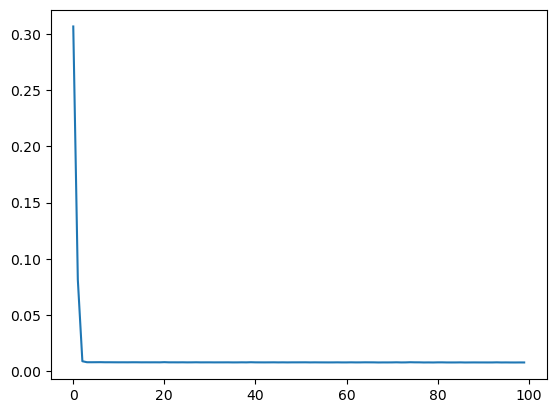

In [26]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, accuracy_score, mean_absolute_percentage_error

In [28]:
from tensorflow.keras.models import load_model
model = load_model('model/')

In [29]:
train_predictions=model.predict(X_train).flatten()
train_predictions=scaler.inverse_transform(train_predictions.reshape(-1,1)).flatten()
true_y_train=scaler.inverse_transform(y_train.reshape(-1,1)).flatten()
train_results=pd.DataFrame(data={'Model Predictions':train_predictions, 'Actual Values':true_y_train})
train_results
#train_predictions

56/56 [==============================] - 0s 1ms/step


,Model Predictions,Actual Values
0,53.244671,54.0
1,51.477100,47.0
2,51.034191,41.0
3,49.471394,55.0
4,50.022430,50.0
...,...,...
1780,72.993553,80.0
1781,73.617737,70.0
1782,72.073982,77.0
1783,72.573189,71.0


In [30]:
# Calculate metrics
mae = mean_absolute_error(train_results['Actual Values'], train_results['Model Predictions'])
mse = mean_squared_error(train_results['Actual Values'], train_results['Model Predictions'])
rmse = np.sqrt(mse)
MAPE=mean_absolute_percentage_error(train_results['Actual Values'], train_results['Model Predictions'])
#r2 = r2_score(test['Total'], test['Predictions'])
#f1 = f1_score(test['Total'], test['Predictions'])
#acc = accuracy_score(test['Total'], test['Predictions'])
# Print metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {round(MAPE*100,2)}%')

#print(f'R-squared: {r2}')
#print(f'f1 Score: {r2}')
#print(f'Accuracy Score: {r2}')

Mean Absolute Error: 6.6617852945621605
Mean Squared Error: 76.49110411226272
Root Mean Squared Error: 8.745919283429428
Mean Absolute Percentage Error: 12.93%


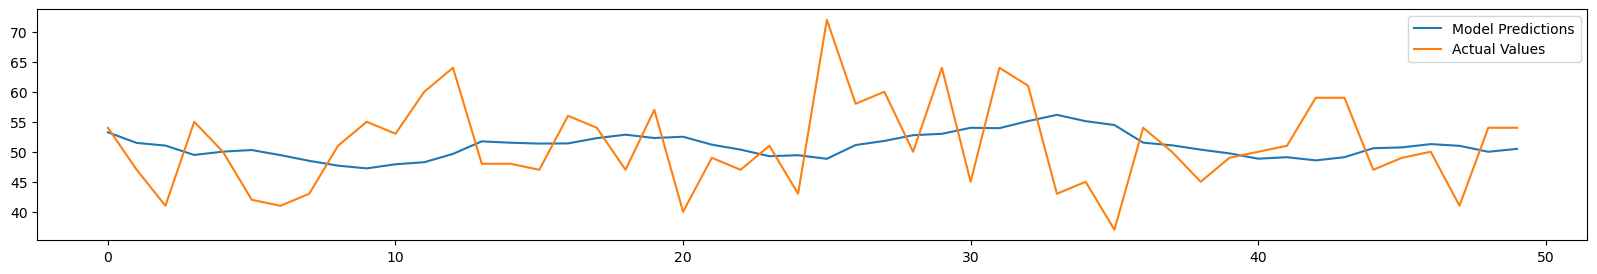

In [31]:
#plt.plot(train_results['Train Predictions'][:50])
#plt.plot(train_results['Actual Values'][:50])

fig=plt.figure(figsize=(20,3))
ax=fig.add_subplot(111)
train_results['Model Predictions'][:50].plot(ax=ax)
train_results['Actual Values'][:50].plot(ax=ax)
#plt.plot(df)+plt.plot(test['Predictions'])
plt.legend()

In [32]:
val_predictions = model.predict(X_val).flatten()
val_predictions=scaler.inverse_transform(val_predictions.reshape(-1,1)).flatten()
true_y_val=scaler.inverse_transform(y_val.reshape(-1,1)).flatten()
val_results = pd.DataFrame(data={'Model Predictions':val_predictions, 'Actual Values':true_y_val})
val_results

7/7 [==============================] - 0s 2ms/step


,Model Predictions,Actual Values
0,72.868156,79.0
1,73.475365,70.0
2,72.299843,83.0
3,73.738075,70.0
4,72.583168,76.0
...,...,...
218,39.331928,39.0
219,39.638088,30.0
220,39.184383,31.0
221,38.597645,42.0


In [33]:
mae = mean_absolute_error(val_results['Actual Values'], val_results['Model Predictions'])
mse = mean_squared_error(val_results['Actual Values'], val_results['Model Predictions'])
rmse = np.sqrt(mse)
MAPE=mean_absolute_percentage_error(val_results['Actual Values'], val_results['Model Predictions'])
#r2 = r2_score(test['Total'], test['Predictions'])
#f1 = f1_score(test['Total'], test['Predictions'])
#acc = accuracy_score(test['Total'], test['Predictions'])
# Print metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {round(MAPE*100,2)}%')

Mean Absolute Error: 5.5095214501624685
Mean Squared Error: 46.67871771233768
Root Mean Squared Error: 6.832182499929117
Mean Absolute Percentage Error: 13.09%


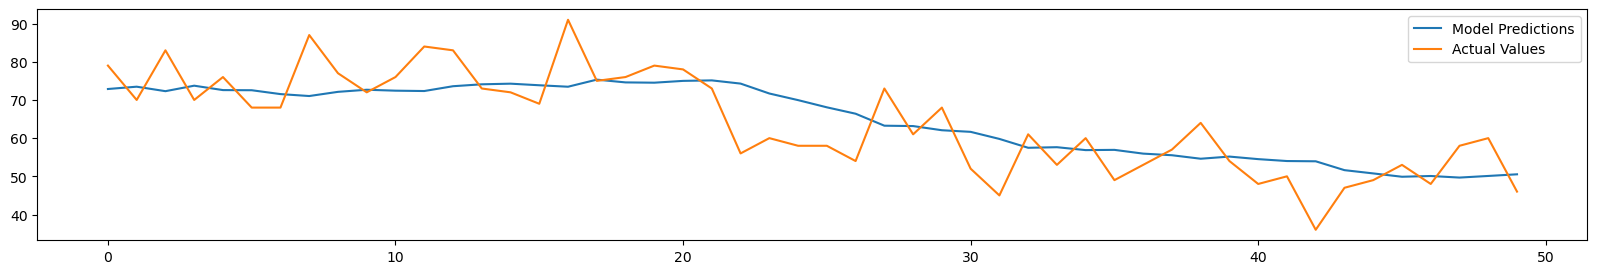

In [34]:
fig=plt.figure(figsize=(20,3))
ax=fig.add_subplot(111)
val_results['Model Predictions'][:50].plot(ax=ax)
val_results['Actual Values'][:50].plot(ax=ax)
#plt.plot(df)+plt.plot(test['Predictions'])
plt.legend()

In [35]:
test_predictions = model.predict(X_test).flatten()
test_predictions=scaler.inverse_transform(test_predictions.reshape(-1,1)).flatten()
true_y_test=scaler.inverse_transform(y_test.reshape(-1,1)).flatten()
test_results = pd.DataFrame(data={'Model Predictions':test_predictions, 'Actual Values':true_y_test})
test_results

7/7 [==============================] - 0s 2ms/step


,Model Predictions,Actual Values
0,38.548870,46.0
1,39.066257,40.0
2,39.322643,36.0
3,39.487160,34.0
4,39.117794,32.0
...,...,...
209,37.153175,32.0
210,36.637566,30.0
211,35.918106,30.0
212,35.218441,22.0


In [36]:
# Calculate metrics
mae = mean_absolute_error(test_results['Actual Values'], test_results['Model Predictions'])
mse = mean_squared_error(test_results['Actual Values'], test_results['Model Predictions'])
rmse = np.sqrt(mse)
MAPE=mean_absolute_percentage_error(test_results['Actual Values'], test_results['Model Predictions'])
#r2 = r2_score(test['Total'], test['Predictions'])
#f1 = f1_score(test['Total'], test['Predictions'])
#acc = accuracy_score(test['Total'], test['Predictions'])
# Print metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {round(MAPE*100,2)}%')

Mean Absolute Error: 5.54324287343248
Mean Squared Error: 52.73106214257282
Root Mean Squared Error: 7.261615670260498
Mean Absolute Percentage Error: 17.41%


[]

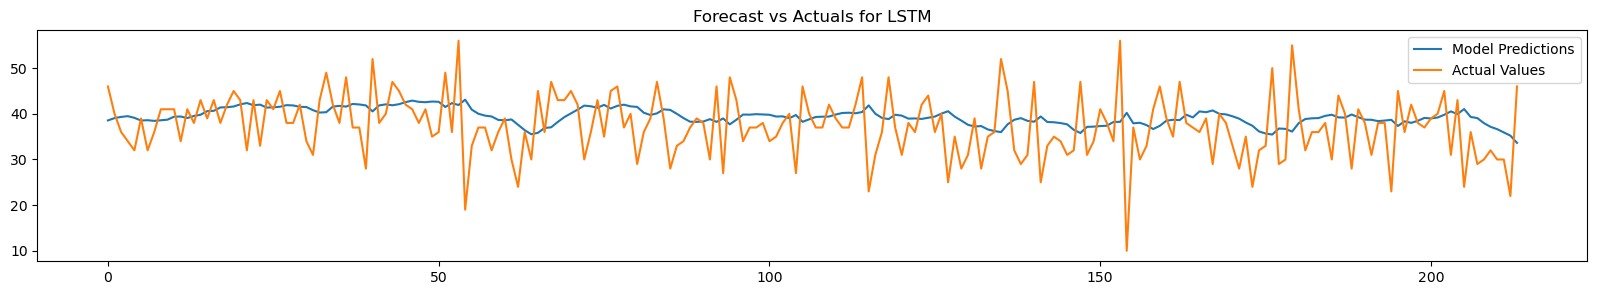

In [112]:
fig=plt.figure(figsize=(20,3))
ax=fig.add_subplot(111)
test_results['Model Predictions'].plot(ax=ax)
test_results['Actual Values'].plot(ax=ax)
plt.title('Forecast vs Actuals for LSTM')
#plt.plot(df)+plt.plot(test['Predictions'])
plt.legend()
plt.plot()

In [38]:
future_predictions=[]
steps=10 # input steps
features=1 # output features; we input 10 days data to output 11th day
days=30 # we are predictig for 30 days
current_batch=temp[-steps:].to_numpy().reshape((1,steps,features))

for i in range(days):
    current_pred=model.predict(current_batch)[0].flatten() #getting prediction value for first batch
    future_predictions.append(current_pred) #append the prediction into the array
    print(current_batch.flatten(),'------>',current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1) #using prediction to update the batch and remove first value    

1/1 [==============================] - 0s 998us/step
[0.42268041 0.22680412 0.35051546 0.27835052 0.28865979 0.30927835
 0.28865979 0.28865979 0.20618557 0.45360825] ------> [0.33954513]
1/1 [==============================] - 0s 0s/step
[0.22680412 0.35051546 0.27835052 0.28865979 0.30927835 0.28865979
 0.28865979 0.20618557 0.45360825 0.33954513] ------> [0.33888778]
1/1 [==============================] - 0s 2ms/step
[0.35051546 0.27835052 0.28865979 0.30927835 0.28865979 0.28865979
 0.20618557 0.45360825 0.33954513 0.33888778] ------> [0.34663683]
1/1 [==============================] - 0s 6ms/step
[0.27835052 0.28865979 0.30927835 0.28865979 0.28865979 0.20618557
 0.45360825 0.33954513 0.33888778 0.34663683] ------> [0.3490596]
1/1 [==============================] - 0s 0s/step
[0.28865979 0.30927835 0.28865979 0.28865979 0.20618557 0.45360825
 0.33954513 0.33888778 0.34663683 0.34905961] ------> [0.35466087]
1/1 [==============================] - 0s 3ms/step
[0.30927835 0.28865979 0.

In [39]:
future_predictions

[array([0.33954513], dtype=float32),
 array([0.33888778], dtype=float32),
 array([0.34663683], dtype=float32),
 array([0.3490596], dtype=float32),
 array([0.35466087], dtype=float32),
 array([0.35983548], dtype=float32),
 array([0.36419466], dtype=float32),
 array([0.36952835], dtype=float32),
 array([0.37492242], dtype=float32),
 array([0.38394362], dtype=float32),
 array([0.38221502], dtype=float32),
 array([0.38582236], dtype=float32),
 array([0.3895333], dtype=float32),
 array([0.39298013], dtype=float32),
 array([0.39640403], dtype=float32),
 array([0.39966357], dtype=float32),
 array([0.40277907], dtype=float32),
 array([0.405786], dtype=float32),
 array([0.4086392], dtype=float32),
 array([0.4113349], dtype=float32),
 array([0.41371298], dtype=float32),
 array([0.41625184], dtype=float32),
 array([0.4186998], dtype=float32),
 array([0.42105082], dtype=float32),
 array([0.4233156], dtype=float32),
 array([0.4254933], dtype=float32),
 array([0.42758942], dtype=float32),
 array([0.

In [40]:
import math

In [41]:
future_predictions=scaler.inverse_transform(future_predictions)
future_predictions

array([[34.93587768],
       [34.87211475],
       [35.62377268],
       [35.85878232],
       [36.40210426],
       [36.90404114],
       [37.32688215],
       [37.84425026],
       [38.36747518],
       [39.24253088],
       [39.07485723],
       [39.42476851],
       [39.78473118],
       [40.11907247],
       [40.45119071],
       [40.76736605],
       [41.06957003],
       [41.36124274],
       [41.63800168],
       [41.8994855 ],
       [42.1301589 ],
       [42.37642831],
       [42.61388069],
       [42.84192923],
       [43.0616146 ],
       [43.2728501 ],
       [43.4761734 ],
       [43.6719979 ],
       [43.8606098 ],
       [44.04250053]])

In [42]:
float(future_predictions[1])

34.87211474776268

In [43]:
pred_data=[]

for i in range(30):
    a=float(future_predictions[i])
    pred_data.append(a)

In [44]:
index_future=pd.date_range(start='2025-02-10',end='2025-03-11')
len(index_future)

30

In [45]:
index_future

DatetimeIndex(['2025-02-10', '2025-02-11', '2025-02-12', '2025-02-13',
               '2025-02-14', '2025-02-15', '2025-02-16', '2025-02-17',
               '2025-02-18', '2025-02-19', '2025-02-20', '2025-02-21',
               '2025-02-22', '2025-02-23', '2025-02-24', '2025-02-25',
               '2025-02-26', '2025-02-27', '2025-02-28', '2025-03-01',
               '2025-03-02', '2025-03-03', '2025-03-04', '2025-03-05',
               '2025-03-06', '2025-03-07', '2025-03-08', '2025-03-09',
               '2025-03-10', '2025-03-11'],
              dtype='datetime64[ns]', freq='D')

In [46]:
future_results = pd.DataFrame(data={'date':index_future, 'Predicted Traffic':pred_data})
#future_results.index=pd.to_datetime(future_predictions['date'])#,format='%Y-%m-%d')
#future_results['Traffic'] = future_results['Traffic'].astype(str).astype(float)
future_results

,date,Predicted Traffic
0,2025-02-10,34.935878
1,2025-02-11,34.872115
2,2025-02-12,35.623773
3,2025-02-13,35.858782
4,2025-02-14,36.402104
5,2025-02-15,36.904041
6,2025-02-16,37.326882
7,2025-02-17,37.844250
8,2025-02-18,38.367475
9,2025-02-19,39.242531


In [47]:
#scaler.inverse_transform(temp.reshape(-1,1))

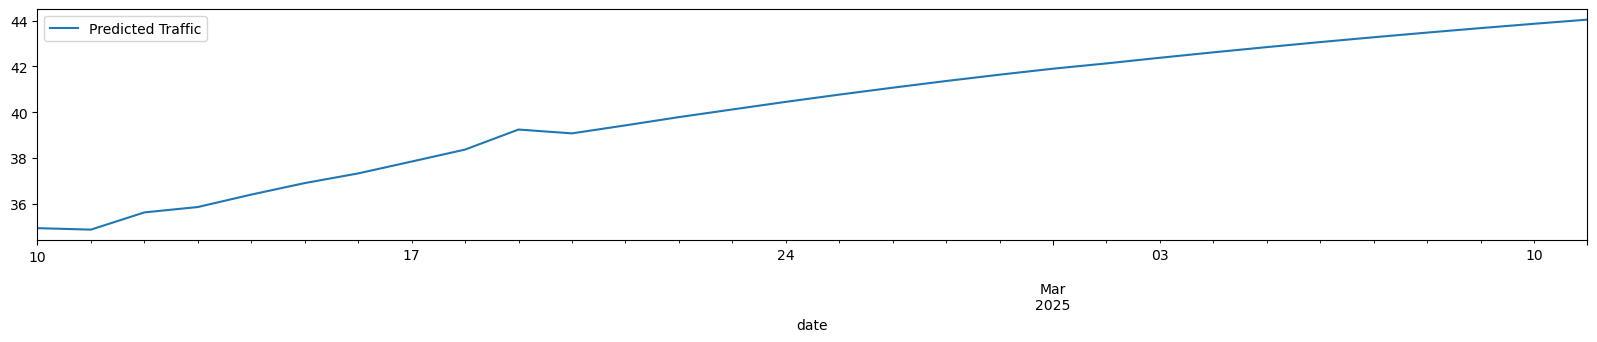

In [48]:
fig=plt.figure(figsize=(20,3))
ax=fig.add_subplot(111)
#temp[-150:].plot(ax=ax)
future_results.plot(x='date',ax=ax)
#plt.plot(df)+plt.plot(test['Predictions'])
plt.legend(['Predicted Traffic'])

In [49]:
print('Average Daily Vessel Traffic Across Suez Canal for next 30 days (February 10, 2025 - March 11, 2025):',round(future_results['Predicted Traffic'].mean(),2))

Average Daily Vessel Traffic Across Suez Canal for next 30 days (February 10, 2025 - March 11, 2025): 40.14
